In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'digit-recognizer:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F3004%2F861823%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240215%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240215T213036Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D50380797981b3dc5562d21e6a3c3f0855c550488c1ed13c05a1c56ffc0ba46e5ffc638bef24d4efc6fd3706261e7e26e828873bb2c9c6bb86b1c4a8285954b64f01b0db6090d64bb2bd2f3b2366811ba66d110772252823372890905669f96adf090613a0877a54f92f2f9d62a24cbb84e59e1d85f3c402c0592bb899008dc20233072816255b6b5586ce1bee4365ba238ec477ccffad5dbf4ce2e7fe7a93bc117799ffdad6d7e216e3f92b64d3b5a3bc7abbd5d2a5902e7ef49f6c6065641c44ebc79c7ac622ee488b7e23f1e2e54464e514697d5a6524477bdcb334500e15431a0fe533e91dee30fcc8220787bdc9edba8bf490b0afbea0a30719984b6e04e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 16054568 bytes downloaded
Downloaded and uncompressed: digit-recognizer
Data source import complete.


# Digit Recognizer

Link to the Kaggle Competition: https://www.kaggle.com/competitions/digit-recognizer

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [ ]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt                        # library to plot the digit

def ploting_a_digit(line, label):                      # this function takes a line from our df and plots a digit
    digit_array = line.to_numpy().reshape((28,28))     # transform the pixels into a 28x28 array
    plt.title("Label: {}".format(label))
    fig = plt.imshow(digit_array, cmap='gist_gray')    # plot the Figure

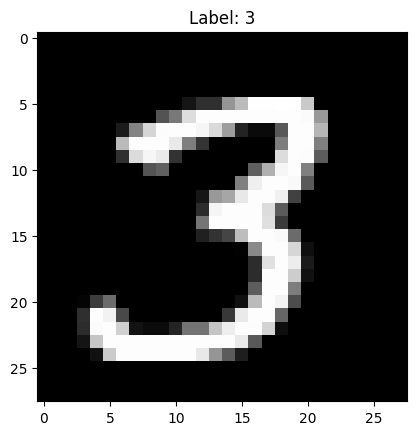

In [ ]:
from random import randint

random_num = randint(0,train.shape[0]-1)                # train.shape[0] - 1 as randint is inclusive in both ends
random_line = train.iloc[random_num,:]

ploting_a_digit(random_line, random_line.pop('label'))  # ploting a random digit

## Digit Recognizer Using RandomForest (RF)

In this project, I chose the Random Forest Classifier as the machine learning method to model the dataset of handwritten digits. This decision was informed by Random Forest's robustness and ability to handle non-linear data efficiently. Random Forest operates by constructing multiple decision trees during training time and outputting the class that is the mode of the classes (classification) of the individual trees. This ensemble method is effective for dealing with the complexities and nuances of handwriting, as it can capture the variations in digit representations through its multitude of trees.

For the technical implementation, I used Python's scikit-learn library, a popular choice for machine learning due to its wide range of algorithms and simplicity in use. The dataset was first preprocessed using MinMaxScaler to normalize the pixel values to a range of 0 to 1, enhancing the algorithm's convergence speed and accuracy. No specific hyperparameters were initially selected for the Random Forest Classifier; the default settings were used, leveraging the simplicity and generally good baseline performance of scikit-learn's implementation. However, this approach allows for further experimentation and tuning, such as adjusting the number of trees in the forest (n_estimators) or the maximum depth of the trees, to improve model performance if necessary.

Data splitting was performed using the train_test_split function, allocating 85% of the data for training and 15% for testing. This split provides a substantial training dataset to learn from while reserving a meaningful portion for evaluating the model's generalization capability to unseen data. The model's performance was assessed based on its accuracy score, which quantifies the proportion of correctly identified digits in the test set.

### Case 1: Using the Full Training & Testing Dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler

train_data = train.copy()

scaler = MinMaxScaler()
labels = train_data.pop('label')

train_set = scaler.fit_transform(train_data)
test_set = scaler.transform(test)

In [ ]:
from sklearn.model_selection import train_test_split

# split our train data using sklearn tran_test_split so we can train our model and measure how good it is working.
X_train, X_test, y_train, y_test = train_test_split(train_set, labels, test_size=0.15)   # our split will be test = 15% train = 85%

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = RandomForestClassifier()   # build our model
model.fit(X_train,y_train)         # train our model

y_pred = model.predict(X_test)
model_score = accuracy_score(y_pred, y_test)
print("Model Accuracy = {:.2f}%".format(model_score*100))

Model Accuracy = 96.44%


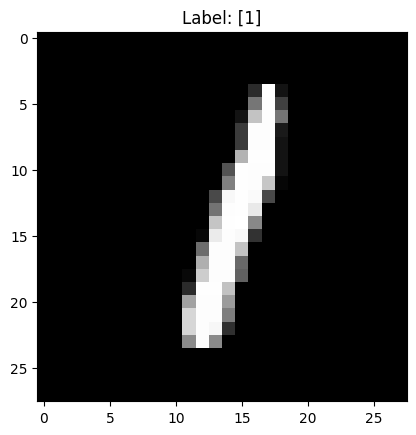

In [ ]:
random_num = randint(0,test.shape[0]-1) # final_test.shape[0] - 1 as randint is inclusive in both ends
random_line = test.iloc[random_num, :]

final_pred = model.predict(random_line.to_numpy().reshape(1,-1)) #predict on a random sample, reshape because is a single sample

ploting_a_digit(random_line, final_pred) #ploting a random prediction

In [ ]:
model_pred = model.predict(test_set)     # predicting values
sample_submission = pd.read_csv("../input/digit-recognizer/sample_submission.csv", index_col='ImageId')
sample_submission.Label = model_pred
sample_submission.to_csv("model_predictions.csv")

### Case 2: Using Half the Training/Testing Dataset

In [ ]:
def split_data_half_per_label(df):
    train_half = pd.DataFrame()
    test_half = pd.DataFrame()

    for label in range(10):  # For each label 0-9
        label_df = df[df['label'] == label]
        half_point = len(label_df) // 2  # Find the mid point

        train_half = pd.concat([train_half, label_df.iloc[:half_point, :]])
        test_half = pd.concat([test_half, label_df.iloc[half_point:, :]])

    return train_half, test_half

In [ ]:
train_half, test_half = split_data_half_per_label(train)
train_half.to_csv("train_halfImages.csv", index=False)
test_half.to_csv("test_halfImages.csv", index=False)

In [ ]:
scaler = MinMaxScaler()

# separate labels from features, and apply scaling
labels_half = train_half.pop('label')
train_half_scaled = scaler.fit_transform(train_half)
test_half_scaled = scaler.transform(test_half.drop('label', axis=1))

model = RandomForestClassifier()  # build our model
model.fit(train_half_scaled, labels_half)  # train our model

# For training set predictions
y_train_pred = model.predict(train_half_scaled)
train_accuracy = accuracy_score(labels_half, y_train_pred)

# For test set predictions, ensure to separate labels for test_half dataset
test_labels = test_half['label']
y_test_pred = model.predict(test_half_scaled)
test_accuracy = accuracy_score(test_labels, y_test_pred)

print(f"Training Accuracy = {train_accuracy*100:.2f}%")
print(f"Test Accuracy = {test_accuracy*100:.2f}%")

Training Accuracy = 100.00%
Test Accuracy = 95.96%


### <b>Interpretation of Results:</b>
The given training and testing accuracy scores indicate that the model performed exceptionally well on both the training subset and the testing subset of the data, with training accuracy at 100.00% and testing accuracy around 96%. Here's a breakdown of why these accuracies are at their respective levels and what could be done to potentially achieve better results:

<b>Training Accuracy: 100.00%</b>
<ul>
    <li>Overfitting: A training accuracy of 100% often suggests that the model has perfectly learned the training dataset, to the point where it may have memorized the training data rather than learned to generalize from it. This could indicate overfitting, especially if the model's performance on the test data is significantly worse.</li>
    <li>Complexity of the Model: RandomForestClassifier is a robust model that can capture complex patterns in the data. Its high performance on the training set shows it was able to capture the nuances of the handwritten digit images perfectly.</li>
</ul>

<b>Test Accuracy: 95.96%</b>
<ul>
    <li>Generalization: The test accuracy is high, indicating that despite the potential overfitting to the training data, the model generalizes well to unseen data. This high accuracy is a testament to the effectiveness of RandomForestClassifier in handling complex classification tasks like digit recognition.</li>
    <li>Room for Improvement: While 95.96% accuracy is impressive, the difference between training and testing accuracy suggests there might be room for improvement, especially in making the model generalize even better.</li>
</ul>

<b>Strategies for Improvement</b>
<ul>
    <li>Hyperparameter Tuning: Adjusting the RandomForestClassifier's hyperparameters (like n_estimators, max_depth, min_samples_split, and min_samples_leaf) could help in achieving a better balance between bias and variance, possibly improving test accuracy.</li>
    <li>Cross-Validation: Using cross-validation techniques, such as k-fold cross-validation, helps in assessing the model's performance more accurately, leading to better estimation of its generalization error.</li>
    <li>Feature Engineering: Exploring different feature extraction techniques, such as Principal Component Analysis (PCA) to reduce dimensionality while preserving variance, might improve model performance by focusing on the most informative aspects of the data.</li>
</ul>

### Case 3: Using Half the Training/Testing Dataset Containing Only Digits 0 - 4

In [ ]:
def split_data_by_digit(df):
    # Splitting the dataset based on digit labels
    train_half_digits = df[df['label'].isin([0, 1, 2, 3, 4])]
    test_half_digits = df[df['label'].isin([5, 6, 7, 8, 9])]
    return train_half_digits, test_half_digits

In [ ]:
train_half_digits, test_half_digits = split_data_by_digit(train)
train_half_digits.to_csv("train_halfDigits.csv", index=False)
test_half_digits.to_csv("test_halfDigits.csv", index=False)

In [ ]:
scaler = MinMaxScaler()

# Separate labels from features, and apply scaling
labels_half_digits = train_half_digits.pop('label')
train_half_digits_scaled = scaler.fit_transform(train_half_digits)
test_half_digits_scaled = scaler.transform(test_half_digits.drop('label', axis=1))

model = RandomForestClassifier()  # build our model
model.fit(train_half_digits_scaled, labels_half_digits)  # train our model

# For training set predictions
y_train_pred = model.predict(train_half_digits_scaled)
train_accuracy = accuracy_score(labels_half_digits, y_train_pred)

# For test set predictions, ensure to separate labels for test_half_digits dataset
test_labels = test_half_digits['label']
y_test_pred = model.predict(test_half_digits_scaled)
test_accuracy = accuracy_score(test_labels, y_test_pred)

print(f"Training Accuracy = {train_accuracy*100:.2f}%")
print(f"Test Accuracy = {test_accuracy*100:.2f}%")

Training Accuracy = 100.00%
Test Accuracy = 0.00%


### <b>Interpretation of Results</b>
The training and testing accuracy results from Case 3 reveal a stark contrast: while the model achieves perfect accuracy on the training set (100.00%), it completely fails on the test set (0.00%). This outcome can be attributed to a fundamental issue with the model's training and testing setup, as well as insights into potential improvements.

<b>Reasons for Low Test Accuracy</b>
<ul>
    <li>Lack of Generalization Across Unseen Classes: The model was trained exclusively on images of digits 0 through 4 and then tested on digits 5 through 9. Since the model has never seen examples of the latter digits during training, it lacks the necessary information to correctly classify them. This scenario is not a typical generalization problem within the same classes but rather a failure to recognize entirely unseen classes.</li>
    <li>Model's Inability to Infer Unseen Classes: Machine learning models, particularly those without a mechanism for handling unseen classes (like most traditional classifiers), cannot infer classes they have not been trained on. The RandomForestClassifier used in this task operates under the assumption that all possible outcomes (in this case, digit classes) are represented in the training data.</li>
</ul>

<b>Strategies for Improvement</b>
<ul>
    <li>Semi-supervised Learning: This technique involves using a small amount of labeled data alongside a larger set of unlabeled data. It could potentially help the model learn better representations of the data, including those digits it has not been explicitly trained on.</li>
    <li>One-shot Learning or Few-shot Learning: These approaches are particularly relevant in situations where very little data is available for some classes. By training a model to learn from very few examples, it might better handle the challenge of classifying unseen digits. This approach is more common with neural network models, especially those designed for tasks like facial recognition.</li>
    <li>Adjusting Model Hyperparameters: Although unlikely to solve the fundamental issue of classifying unseen digits, experimenting with different hyperparameters (like the depth of the trees in RandomForest) could maximize the model's performance within the constraints of the given training data.</li>
</ul>